# TITANIC SHIPWRECK - Predict the Survivors!

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This allows multiple outputs per code block to display, not just the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**Goal**

To predict if a passenger survived the sinking of the Titanic or not. For each passenger in the _test_ set, a prediction of a 0 or 1 value must be made for the variable.

**Metric**

The score is the percentage of passengers correctly predicted. This is known as accuracy.

**Here is the breakdown of the data types**

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [20]:
# Import data and take a look at it to see format and columns
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
example_submission = pd.read_csv('data/gender_submission.csv')

train.head()
train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing information
Check for any missing values and report how many there are per category

In [21]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like Age and Cabin have quite a few missing values. Let's keep this in mind and investigate further later.

We see that some variables are categorical, and perhaps not super useful in helping with classification. Let's drop these features for now.

In [22]:
categorical = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
train.drop(categorical, axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore this new dataframe

In [23]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Group the passengers into 0 and 1 for survived, and calculate the means for all these continuous variables to see if we can get a feel for a good predictor.

In [24]:
train.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


Looks like 2 variables stand out:

1. Pclass
2. Fare

These 2 variables seem to have some separation for survivorship

### Correlation of all categories to survivorship
See if there is correlation between any of the variables and survival, and sort the values to ease recognition of most positively and negatively correlated features. This backs up what we just saw above.

In [25]:
train.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Let's take a look at Age as well as Fare with respect to Survived.

Text(0.5, 1.0, 'Overlaid histogram for Age')

NameError: name 'I' is not defined

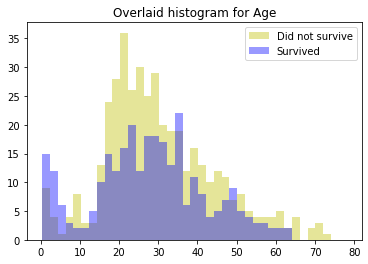

In [37]:
for i in ['Age', 'Fare']:
    died = list(train[train['Survived'] == 0][i].dropna())
    survived = list(train[train['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color = 'y', kde = False, bins = np.arange(xmin, xmax, width));
    sns.distplot(survived, color = 'b', kde = False, bins = np.arange(xmin, xmax, width));
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()